# Introduction

This AI System will describe the implementation and comparison of distinct machine learning algorithms on a selected dataset. The dataset being analysed is named **emails.csv** which has been obtained from the open-source repository of datasets on Kaggle.

The dataset is a csv file that classifies emails as either spam (a value of 1) or not spam (a value of 0). It contains related information of 5172 randomly selected emails and their respective labels showing whether they have been classed as spam. There are 5172 rows (one for each email) and 3002 columns. The first column tells us the Email name, which has been set to a number rather than the recipient name in order to protect privacy. The final column shows the labels for prediction. The remaining 3000 columns represent the most common words that appear throughout the 5172 emails*. For each individual email, the total count of each of these most common words are stored in the respective cells in that row. The structure is such that the information regarding all 5172 emails are stored in a compact dataframe rather than as separate text files.

**The most common words after excluding all non-alphabetical characters and words*

The required packages for the machine learning tasks are imported:

In [1]:
from google.colab import files

import pandas as pd
import io
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split #train/test split
from sklearn.preprocessing import StandardScaler #feature scaling
from sklearn.metrics import confusion_matrix #confusion matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.linear_model import LogisticRegression # first algorithm
from sklearn.ensemble import RandomForestClassifier #second algorithm
from sklearn.naive_bayes import GaussianNB #third algorithm
from sklearn.svm import SVC #fourth algorithm

uploaded = files.upload()

Saving emails.csv to emails.csv


The dataset is loaded and the first 10 rows of data are previewed:

In [2]:
emails_file = io.BytesIO(uploaded['emails.csv'])
emails = pd.read_csv(emails_file)
emails.head(10)

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0
5,Email 6,4,5,1,4,2,3,45,1,0,...,0,0,0,0,0,0,0,0,0,1
6,Email 7,5,3,1,3,2,1,37,0,0,...,0,0,0,0,0,0,0,0,0,0
7,Email 8,0,2,2,3,1,2,21,6,0,...,0,0,0,0,0,0,0,1,0,1
8,Email 9,2,2,3,0,0,1,18,0,0,...,0,0,0,0,0,0,0,0,0,0
9,Email 10,4,4,35,0,1,0,49,1,16,...,0,0,0,0,0,0,0,0,0,0


A quick count of the 'Prediction' column summarises that there are 1500 emails classified as Spam, with the remaining 3672 classified as Not Spam:

In [3]:
emails['Prediction'].value_counts()

0    3672
1    1500
Name: Prediction, dtype: int64

# Pre-Processing Steps

While removing null values would usually be a key step in the pre-processing stage, there are no missing values in this dataset so it is not required:

In [4]:
emails.isnull().sum()

Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3002, dtype: int64

<Axes: >

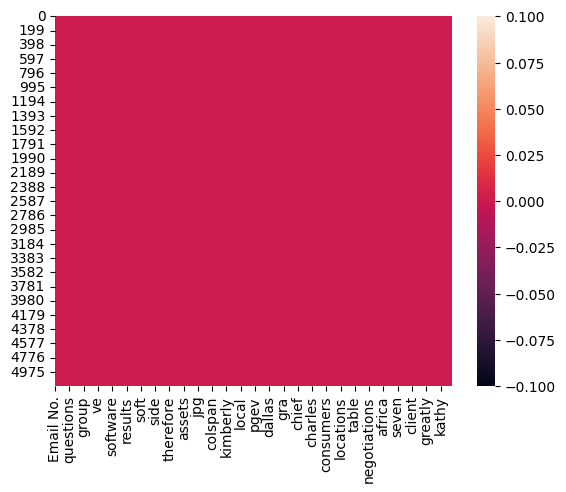

In [5]:
sns.heatmap(emails.isnull())

It would make sense to drop the 'Email No' column so that it leaves only the columns showing the most common words (data features) and the target variable:

In [6]:
emails=emails.set_index('Email No.', drop=True)
emails

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
Email No.,,,,,,,,,,,,,,,,,,,,,
Email 1,0,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Email 2,8,13,24,6,6,2,102,1,27,18,...,0,0,0,0,0,0,0,1,0,0
Email 3,0,0,1,0,0,0,8,0,0,4,...,0,0,0,0,0,0,0,0,0,0
Email 4,0,5,22,0,5,1,51,2,10,1,...,0,0,0,0,0,0,0,0,0,0
Email 5,7,6,17,1,5,2,57,0,9,3,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Email 5168,2,2,2,3,0,0,32,0,0,5,...,0,0,0,0,0,0,0,0,0,0
Email 5169,35,27,11,2,6,5,151,4,3,23,...,0,0,0,0,0,0,0,1,0,0
Email 5170,0,0,1,1,0,0,11,0,0,1,...,0,0,0,0,0,0,0,0,0,1


We can first return a statistical summary of the dataframe with the describe function:

In [7]:
emails.describe()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
count,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,...,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000
mean,6.640565,6.188128,5.143852,3.075599,3.124710,2.627030,55.517401,2.466551,2.024362,10.600155,...,0.005027,0.012568,0.010634,0.098028,0.004254,0.006574,0.004060,0.914733,0.006961,0.290023
std,11.745009,9.534576,14.101142,6.045970,4.680522,6.229845,87.574172,4.314444,6.967878,19.281892,...,0.105788,0.199682,0.116693,0.569532,0.096252,0.138908,0.072145,2.780203,0.098086,0.453817
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,12.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,3.000000,1.000000,1.000000,2.000000,1.000000,28.000000,1.000000,0.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.000000,7.000000,4.000000,3.000000,4.000000,2.000000,62.250000,3.000000,1.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,210.000000,132.000000,344.000000,89.000000,47.000000,77.000000,1898.000000,70.000000,167.000000,223.000000,...,4.000000,7.000000,2.000000,12.000000,3.000000,4.000000,3.000000,114.000000,4.000000,1.000000


Further statistical analysis can be gained by finding the pairwise correlation of the data in the dataframe. This refers to the measurement of the relationship or association between pairs of variables:

In [8]:
emails.corr()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
the,1.000000,0.852715,0.337249,0.841200,0.784112,0.796397,0.784451,0.471392,0.303621,0.845670,...,0.008926,0.075479,0.225586,0.223426,0.101768,0.129466,0.127019,0.341878,0.051021,-0.004421
to,0.852715,1.000000,0.375480,0.825474,0.781971,0.752722,0.896466,0.508513,0.347993,0.881759,...,0.013250,0.101247,0.232847,0.255793,0.093322,0.091639,0.120059,0.406666,0.071388,0.055277
ect,0.337249,0.375480,1.000000,0.272863,0.369777,0.178028,0.400009,0.155783,0.974152,0.298387,...,0.134339,0.031431,0.046080,0.061550,0.004393,-0.007690,0.004368,0.141460,0.002492,-0.120782
and,0.841200,0.825474,0.272863,1.000000,0.751287,0.809665,0.815196,0.476764,0.235953,0.874276,...,0.005151,0.104454,0.272963,0.253440,0.151980,0.084147,0.124766,0.400225,0.042484,0.114364
for,0.784112,0.781971,0.369777,0.751287,1.000000,0.681457,0.744098,0.495852,0.329051,0.762659,...,0.022168,0.041775,0.236213,0.213631,0.134469,0.067151,0.121057,0.301074,0.038126,-0.003101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
military,0.129466,0.091639,-0.007690,0.084147,0.067151,0.073004,0.111685,0.006498,0.005429,0.120620,...,-0.002249,-0.002979,0.043408,0.104297,0.041300,1.000000,0.055227,0.049524,0.010835,0.064850
allowing,0.127019,0.120059,0.004368,0.124766,0.121057,0.108786,0.105358,0.082757,-0.000966,0.138099,...,-0.002675,-0.003543,-0.005130,0.018550,0.276001,0.055227,1.000000,0.096212,-0.003995,0.011279
ff,0.341878,0.406666,0.141460,0.400225,0.301074,0.444252,0.464473,0.195058,0.114210,0.448303,...,0.005403,0.073690,0.130356,0.164296,0.114092,0.049524,0.096212,1.000000,0.049690,0.135479
dry,0.051021,0.071388,0.002492,0.042484,0.038126,0.026403,0.093822,0.028883,0.000601,0.077751,...,-0.003373,0.035028,-0.006468,0.018939,-0.003137,0.010835,-0.003995,0.049690,1.000000,-0.006260


Prior to implementing any algorithms, the data should be seperated into arrays so we can distinguish between the target variable we are intending to predict (spam/not spam) and the features influencing this (the most common words from the emails):

In [9]:
x = emails.iloc[:,1:3000] # assign all data features to variable x
x.head()

,to,ect,and,for,of,a,you,hou,in,on,...,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry
Email No.,,,,,,,,,,,,,,,,,,,,,
Email 1,0,1,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Email 2,13,24,6,6,2,102,1,27,18,21,...,0,0,0,0,0,0,0,0,1,0
Email 3,0,1,0,0,0,8,0,0,4,2,...,0,0,0,0,0,0,0,0,0,0
Email 4,5,22,0,5,1,51,2,10,1,5,...,0,0,0,0,0,0,0,0,0,0
Email 5,6,17,1,5,2,57,0,9,3,12,...,0,0,0,0,0,0,0,0,1,0


In [10]:
y = emails.iloc[:,-1] # assign the target to variable y
y.head()

Email No.
Email 1    0
Email 2    0
Email 3    0
Email 4    0
Email 5    0
Name: Prediction, dtype: int64

Train/Test splits are then created, with 70% for training and 30% for testing:

In [11]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.3, random_state = 101)

## Feature Scaling

Feature scaling will ensure that all features have a similar scale, which should allow the algorithms to work more effectively.

In [12]:
sc = StandardScaler()

train_x = sc.fit_transform(train_x)
test_x = sc.fit_transform(test_x)

In [13]:
#observe the effects of the scaling
train_x
test_x

array([[-0.12736002, -0.30095002,  0.16472342, ..., -0.05435264,
         0.01080775, -0.0919078 ],
       [ 0.40542367, -0.30095002, -0.35807974, ..., -0.05435264,
        -0.23954482, -0.0919078 ],
       [-0.23391675, -0.23064984, -0.53234746, ..., -0.05435264,
         0.01080775, -0.0919078 ],
       ...,
       [-0.55358696, -0.30095002, -0.53234746, ..., -0.05435264,
        -0.23954482, -0.0919078 ],
       [-0.23391675, -0.30095002, -0.35807974, ..., -0.05435264,
        -0.23954482, -0.0919078 ],
       [ 0.08575346, -0.30095002,  0.33899114, ..., -0.05435264,
         0.76186546, -0.0919078 ]])

## Machine Learning algorithms to be implemented

The machine learning algorithms being considered are **Logistic Regression**, **Random Forest Classifier**, **Naive Bayes** and **Support Vector Machines (SVM)**. For each model, the accuracy score will be calculated and a confusion matrix displayed to show how well it performs at correctly predicting the classification of the emails. Additional metrics to be provided to further enhance the evaluation are the precision, recall and F1 scores for each model.

A dictionary is defined which will be used to store the results of each model:

In [14]:
results = {}

# Description of First Algorithm: Logistic Regression

Logistic regression is well-suited for classification problems like this one. The model uses the sigmoid function to model the probability that a given data point belongs to a particular category. The function will "squeeze" the output of a linear equation into a value between 0 and 1, which will be interpreted as a probability.

# Implementation and Evaluation of First Algorithm: Logistic Regression

In [15]:
# fit logistic regression to the training set
lr = LogisticRegression(max_iter=1000,random_state=12)
lr.fit(train_x, train_y)

LogisticRegression(max_iter=1000, random_state=12)

In [16]:
# predict the test set result
y_pred_lr = lr.predict(test_x)
y_pred_lr

array([1, 0, 0, ..., 1, 0, 0])

In [17]:
# create the confusion matrix
cm_lr = confusion_matrix(test_y, y_pred_lr)
cm_lr

array([[1080,   34],
       [  23,  415]])

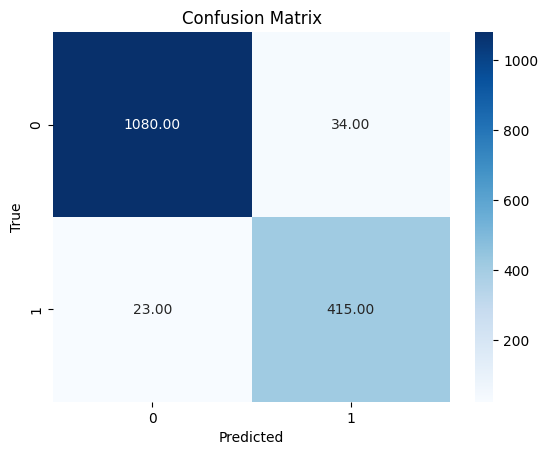

In [20]:
# display confusion matrix graph using seaborn
sns.heatmap(cm_lr, annot=True, fmt='.2f', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [21]:
# evaluate the Logistic Regression model
lr_accuracy = accuracy_score(test_y, y_pred_lr)
lr_precision = precision_score(test_y, y_pred_lr)
lr_recall = recall_score(test_y, y_pred_lr)
lr_f1 = f1_score(test_y, y_pred_lr)

# store results of Logistic Regression model in the dictionary
results["Logistic Regression"] = {"accuracy": lr_accuracy,
                                  "precision": lr_precision,
                                  "recall": lr_recall,
                                  "f1_score": lr_f1
                                 }
results

{'Logistic Regression': {'accuracy': 0.9632731958762887,
  'precision': 0.9242761692650334,
  'recall': 0.9474885844748858,
  'f1_score': 0.9357384441939121}}

# Description of Second Algorithm: Random Forest Classifier

Random Forest Classifier is an ensemble learning method that can be used for classification problems. The output of the random forest is the class selected by most trees. It combines the concepts of bagging and decision trees to create a robust and accurate predictive model.

# Implementation and Evaluation of Second Algorithm: Random Forest Classifier:

In [22]:
# fit random forest classifier to the training set
rfc= RandomForestClassifier(n_estimators= 10, criterion="entropy")
rfc.fit(train_x, train_y)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [23]:
# predict the test set result
y_pred_rfc = rfc.predict(test_x)
y_pred_rfc

array([1, 0, 0, ..., 1, 0, 0])

In [24]:
# create the confusion matrix
cm_rfc = confusion_matrix(test_y, y_pred_rfc)
cm_rfc

array([[1082,   32],
       [  49,  389]])

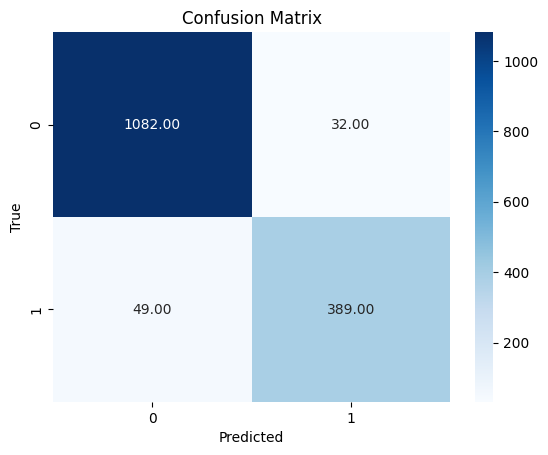

In [25]:
# display confusion matrix graph using seaborn
sns.heatmap(cm_rfc, annot=True, fmt='.2f', cmap='Blues') #annot determines display value or not. fmt determines the values as decimal or float.
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [26]:
# evaluate the Random Forest Classifier model
rfc_accuracy = accuracy_score(test_y, y_pred_rfc)
rfc_precision = precision_score(test_y, y_pred_rfc)
rfc_recall = recall_score(test_y, y_pred_rfc)
rfc_f1 = f1_score(test_y, y_pred_rfc)

# store results of Random Forest Classifier model in the dictionary
results["Random Forest Classifier"] = {"accuracy": rfc_accuracy,
                                  "precision": rfc_precision,
                                  "recall": rfc_recall,
                                  "f1_score": rfc_f1
                                 }
results

{'Logistic Regression': {'accuracy': 0.9632731958762887,
  'precision': 0.9242761692650334,
  'recall': 0.9474885844748858,
  'f1_score': 0.9357384441939121},
 'Random Forest Classifier': {'accuracy': 0.9478092783505154,
  'precision': 0.9239904988123515,
  'recall': 0.8881278538812786,
  'f1_score': 0.9057043073341093}}

# Description of Third Algorithm: Naive Bayes

The emails are being classified as either spam (value = 1) or not spam (value = 0). The Naive Bayes model will search for potential words it has seen in previous spam emails and if it finds a majority of those words, will label it as spam.

Lets use three of the most common words from our dataset as examples to explain this better:

1.   *Example 1: the word 'military' (common word from column 2997) is present in both 'Spam' and 'Not Spam' emails.*
2.   *Example 2: the word 'infrastructure' (common word from column 2996) is present only in 'Spam' emails.*
3.   *Example 3: the word 'connevay' (common word from column 2992) is present only in 'Spam' emails.*

Using these hypothetical scenarios as examples, if a new test email arrives containing all three of these words, there is a high probability that the email is spam, so the model will categorise it as such.





# Implementation and Evaluation of Third Algorithm: Naive Bayes



In [27]:
# fit naive bayes to the training set
nb = GaussianNB()
nb.fit(train_x, train_y)

GaussianNB()

In [28]:
# predict the test set result
y_pred_nb = nb.predict(test_x)
y_pred_nb

array([1, 0, 0, ..., 0, 0, 0])

In [29]:
# create the confusion matrix
cm_nb = confusion_matrix(test_y, y_pred_nb)
cm_nb

array([[1105,    9],
       [ 195,  243]])

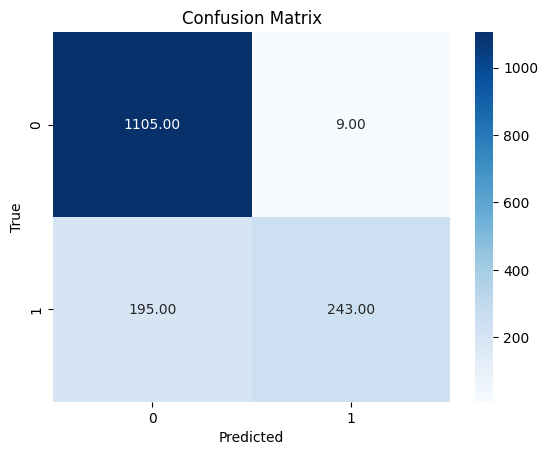

In [30]:
# display confusion matrix graph using seaborn
sns.heatmap(cm_nb, annot=True, fmt='.2f', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [31]:
# evaluate the Naive Bayes model
nb_accuracy = accuracy_score(test_y, y_pred_nb)
nb_precision = precision_score(test_y, y_pred_nb)
nb_recall = recall_score(test_y, y_pred_nb)
nb_f1 = f1_score(test_y, y_pred_nb)

# store results of Naive Bayes model in the dictionary
results["Naive Bayes"] = {"accuracy": nb_accuracy,
                                  "precision": nb_precision,
                                  "recall": nb_recall,
                                  "f1_score": nb_f1
                                 }
results

{'Logistic Regression': {'accuracy': 0.9632731958762887,
  'precision': 0.9242761692650334,
  'recall': 0.9474885844748858,
  'f1_score': 0.9357384441939121},
 'Random Forest Classifier': {'accuracy': 0.9478092783505154,
  'precision': 0.9239904988123515,
  'recall': 0.8881278538812786,
  'f1_score': 0.9057043073341093},
 'Naive Bayes': {'accuracy': 0.8685567010309279,
  'precision': 0.9642857142857143,
  'recall': 0.5547945205479452,
  'f1_score': 0.7043478260869566}}

# Description of Fourth Algorithm: Support Vector Machines

The SVM algorithm will work to find the maximum margin or threshold between the support vectors of the two classes. This is especially well-suited for binary classification problems where the goal is to separate data points into two classes. SVM will find a hyperplane that best separates the margin between the classes. The margin is the distance between the hyperplane and the nearest data points from each class. These nearest data points are known as "support vectors".

# Implementation and Evaluation of Fourth Algorithm: Support Vector Machines

In [36]:
# fit SVM to the training set
svc = SVC(kernel='linear', random_state=0)
svc.fit(train_x, train_y)

SVC(kernel='linear', random_state=0)

In [37]:
# predict the test set result
y_pred_svc = svc.predict(test_x)
y_pred_svc

array([1, 0, 0, ..., 1, 0, 0])

In [38]:
# create the confusion matrix
cm_svm = confusion_matrix(test_y, y_pred_svc)
cm_svm

array([[1053,   61],
       [  42,  396]])

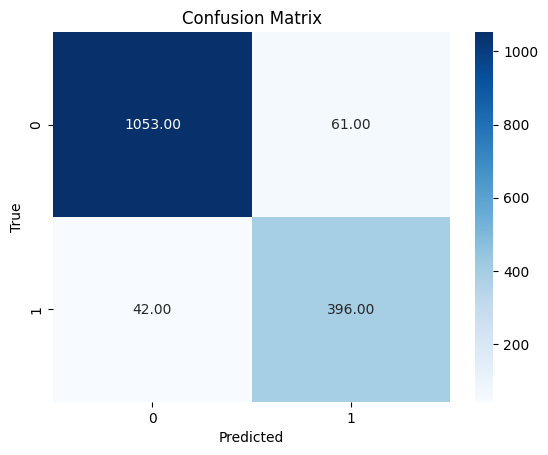

In [39]:
# display confusion matrix graph using seaborn
sns.heatmap(cm_svm, annot=True, fmt='.2f', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [40]:
# evaluate the SVM model
svm_accuracy = accuracy_score(test_y, y_pred_svc)
svm_precision = precision_score(test_y, y_pred_svc)
svm_recall = recall_score(test_y, y_pred_svc)
svm_f1 = f1_score(test_y, y_pred_svc)

# store results of SVM model in the dictionary
results["SVM"] = {"accuracy": svm_accuracy,
                                  "precision": svm_precision,
                                  "recall": svm_recall,
                                  "f1_score": svm_f1
                                 }
results

{'Logistic Regression': {'accuracy': 0.9632731958762887,
  'precision': 0.9242761692650334,
  'recall': 0.9474885844748858,
  'f1_score': 0.9357384441939121},
 'Random Forest Classifier': {'accuracy': 0.9478092783505154,
  'precision': 0.9239904988123515,
  'recall': 0.8881278538812786,
  'f1_score': 0.9057043073341093},
 'Naive Bayes': {'accuracy': 0.8685567010309279,
  'precision': 0.9642857142857143,
  'recall': 0.5547945205479452,
  'f1_score': 0.7043478260869566},
 'SVM': {'accuracy': 0.9336340206185567,
  'precision': 0.8665207877461707,
  'recall': 0.9041095890410958,
  'f1_score': 0.8849162011173185}}

# Evaluation of Results

The best algorithm for this dataset is **Logistic Regression**. It has the highest model accuracy at around **96.3**%.

The accuracy for each model can be plotted on a graph for comparison:

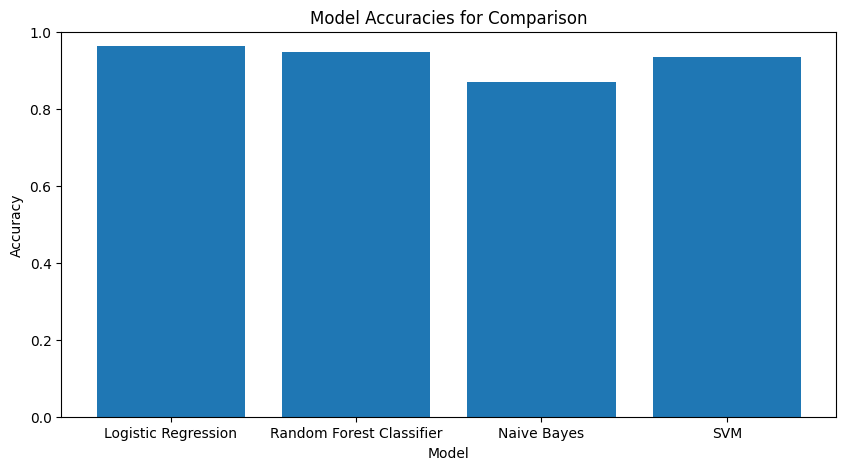

In [41]:
plt.figure(figsize=(10,5))
plt.bar(results.keys(), [result["accuracy"] for result in results.values()])
plt.title("Model Accuracies for Comparison")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()

It would be useful to see the same graphical comparison for the models' precision, recall and F1 scores:

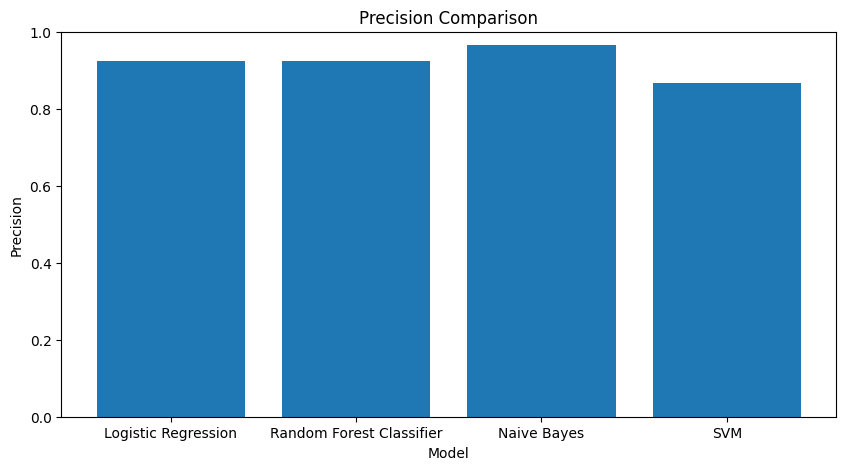

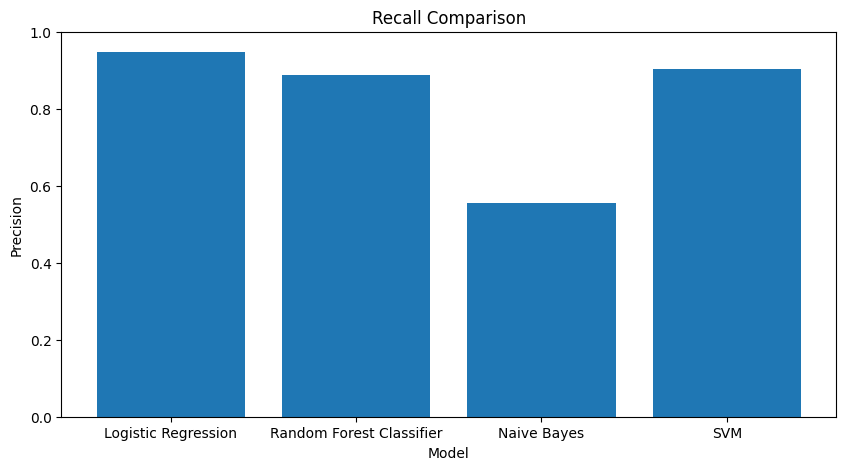

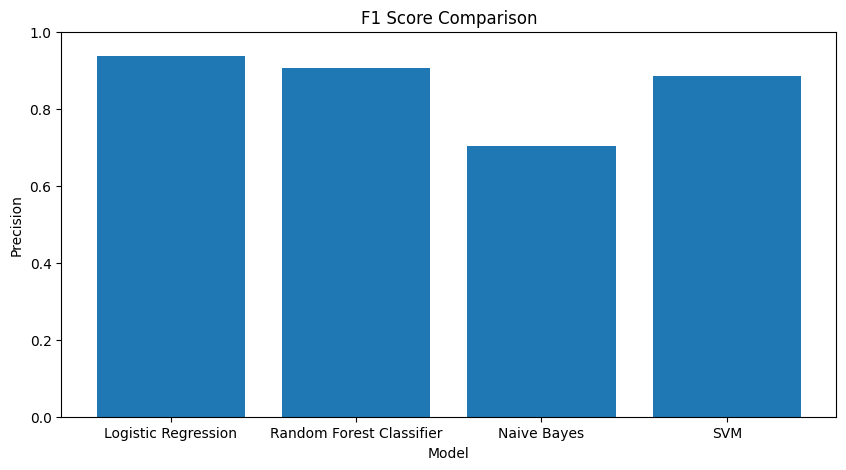

In [42]:
plt.figure(figsize=(10,5))
plt.bar(results.keys(), [result["precision"] for result in results.values()])
plt.title("Precision Comparison")
plt.xlabel("Model")
plt.ylabel("Precision")
plt.ylim(0, 1)
plt.show()

plt.figure(figsize=(10,5))
plt.bar(results.keys(), [result["recall"] for result in results.values()])
plt.title("Recall Comparison")
plt.xlabel("Model")
plt.ylabel("Precision")
plt.ylim(0, 1)
plt.show()

plt.figure(figsize=(10,5))
plt.bar(results.keys(), [result["f1_score"] for result in results.values()])
plt.title("F1 Score Comparison")
plt.xlabel("Model")
plt.ylabel("Precision")
plt.ylim(0, 1)
plt.show()

We may find that a model scores higher in one metric and lower in another, so a good visual representation of this is to plot the metrics by model in a bar chart:

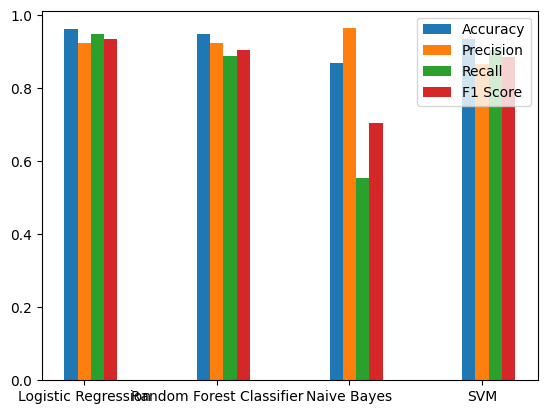

In [43]:
accuracies = [results[model]['accuracy'] for model in results]
precisions = [results[model]['precision'] for model in results]
recalls = [results[model]['recall'] for model in results]
f1_scores = [results[model]['f1_score'] for model in results]

bar_width = 0.1
index = np.arange(len(results))

plt.bar(index, accuracies, bar_width, label='Accuracy')
plt.bar(index + bar_width, precisions, bar_width, label='Precision')
plt.bar(index + 2 * bar_width, recalls, bar_width, label='Recall')
plt.bar(index + 3 * bar_width, f1_scores, bar_width, label='F1 Score')

plt.xticks(index + bar_width, list(results.keys()))
plt.legend()
plt.show()

Based on the analysis above, Logistic Regression is the best performing machine learning model of the four we have compared. This suggests that the Logistic Regression model has the highest ability to correctly predict emails as spam or not spam with relatively few false positives and false negatives, as visualised on the confusion matrix.

It is worth noting that model performance is always dependant on its specific use case and the problem at hand. For example, if the cost of misclassifying an email as spam when it is not is higher, then a model with a high recall (even if its precision is lower) might be more desirable.